# [Analyzing Flight Delays and Cancellations](https://app.datacamp.com/learn/projects/1962)
![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the '[pnwflights2022](https://github.com/moderndive/pnwflights22)' datasets available from the [ModernDive](https://moderndive.com/) team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [95]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Inspect our data
display(flights.head())
print(flights.info())

display(weather.head())
print(weather.info())

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,route
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,SEA-IAH
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,SEA-FAI
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ATL
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ORD
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,PDX-ORD


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111376 entries, 0 to 111375
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111376 non-null  int64  
 1   month           111376 non-null  int64  
 2   day             111376 non-null  int64  
 3   dep_time        108931 non-null  float64
 4   sched_dep_time  111376 non-null  int64  
 5   dep_delay       108931 non-null  float64
 6   arr_time        108834 non-null  float64
 7   sched_arr_time  111376 non-null  int64  
 8   arr_delay       108697 non-null  float64
 9   carrier         111376 non-null  object 
 10  flight          111376 non-null  int64  
 11  tailnum         111247 non-null  object 
 12  origin          111376 non-null  object 
 13  dest            111376 non-null  object 
 14  air_time        108697 non-null  float64
 15  distance        111376 non-null  int64  
 16  hour            111376 non-null  int64  
 17  minute    

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,group
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,< 10 mph
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,≤ 10mph
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,< 10 mph
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,< 10 mph
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,< 10 mph


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  111006 non-null  int64  
 8   arr_delay       108332 non-null  float64
 9   carrier         111006 non-null  object 
 10  flight          111006 non-null  int64  
 11  tailnum         110877 non-null  object 
 12  origin          111006 non-null  object 
 13  dest            111006 non-null  object 
 14  air_time        108332 non-null  float64
 15  distance        111006 non-null  int64  
 16  hour            111006 non-null  int64  
 17  minute    

In [93]:
# Get the common columns between flights and weather
columns_common_to_both = list((flights.columns).intersection(weather.columns))
print(f'{len(columns_common_to_both)} columns in both: {columns_common_to_both}')

# Get the columns in flights not in weather
columns_not_in_weather = list((flights.columns).difference(weather.columns))
print(f'\n{len(columns_not_in_weather)} columns not in Weather: {columns_not_in_weather}')

# Get the columns in weather not in flights
columns_not_in_flight = list((weather.columns).difference(flights.columns))
print(f'\n{len(columns_not_in_flight)} columns not in Flight: {columns_not_in_flight}')

20 columns in both: ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'airline', 'route']

1 columns not in Weather: ['time_hour']

10 columns not in Flight: ['dewp', 'group', 'humid', 'precip', 'pressure', 'temp', 'visib', 'wind_dir', 'wind_gust', 'wind_speed']


In [9]:
flights_missing_counts = flights.isna().sum()
flights_missing_counts = flights_missing_counts[flights_missing_counts != 0]
display(flights_missing_counts)

dep_time     2445
dep_delay    2445
arr_time     2542
arr_delay    2679
tailnum       129
air_time     2679
dtype: int64

In [10]:
weather_missing_counts = weather.isna().sum()
weather_missing_counts = weather_missing_counts[weather_missing_counts != 0]
display(weather_missing_counts)

dep_time      2440
dep_delay     2440
arr_time      2537
arr_delay     2674
tailnum        129
air_time      2674
wind_dir      3163
wind_speed     279
wind_gust      279
dtype: int64

**Observations:**
- The flights data has 20 columns and 111376 rows.
- The weather data has 29 columns and 111006 rows.
- There are 19 overlapping columns between flights and weather.
  - The flights data has 1 column not present in the weather data which is `time_hour`.
- The weather data has 10 additional columns:
  - route
  - temp
  - dewp
  - humid
  - wind_dir
  - wind_speed 
  - wind_gust
  - precip
  - pressure
  - visib


**Create Route column for flights**

In [58]:
flights['route'] = flights['origin'] + '-' + flights['dest']
flights[['origin', 'dest', 'route']]

,origin,dest,route
0,SEA,IAH,SEA-IAH
1,SEA,FAI,SEA-FAI
2,SEA,ATL,SEA-ATL
3,SEA,ORD,SEA-ORD
4,PDX,ORD,PDX-ORD
...,...,...,...
111371,SEA,EWR,SEA-EWR
111372,SEA,LAX,SEA-LAX
111373,SEA,ORD,SEA-ORD
111374,SEA,JFK,SEA-JFK


- For routes, calculate the average departure delays and highest number of canceled flights and store this as a DataFrame called `routes_delays_cancels`, resetting the index after calculating.

In [96]:
routes_delays_cancels = flights.groupby('route').agg(mean_dep_delay=('dep_delay', 'mean'), total_cancellations=('dep_time', lambda x: x.isna().sum())).reset_index()
routes_delays_cancels

,route,mean_dep_delay,total_cancellations
0,PDX-ABQ,1.098039,2
1,PDX-ANC,4.748936,4
2,PDX-ATL,7.020979,13
3,PDX-AUS,5.435374,5
4,PDX-BOI,5.136430,7
...,...,...,...
144,SEA-STS,6.782493,5
145,SEA-SUN,5.735537,5
146,SEA-TPA,6.537344,20
147,SEA-TUS,6.161290,13


- For airlines, determine the average departure delays and the highest number of canceled flights and store this as a DataFrame called `airlines_delays_cancels`, resetting the index after calculating.

In [97]:
airlines_delays_cancels = flights.groupby('airline').agg(mean_dep_delay=('dep_delay', 'mean'), total_cancellations=('dep_time', lambda x: x.isna().sum())).reset_index()
airlines_delays_cancels

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
3,Delta Air Lines Inc.,10.648634,383
4,Frontier Airlines Inc.,14.355856,12
5,Hawaiian Airlines Inc.,8.186207,4
6,Horizon Air,6.270965,238
7,JetBlue Airways,42.141524,33
8,SkyWest Airlines Inc.,4.596561,165
9,Southwest Airlines Co.,11.407163,100


- Produce two bar graphs to show (1) the top 9 highest number of cancellations by route in a plot called `top9_route_cancels_bar` and (2) the top 9 highest average departure delays by airline in a plot called `top9_airline_delays_bar`.

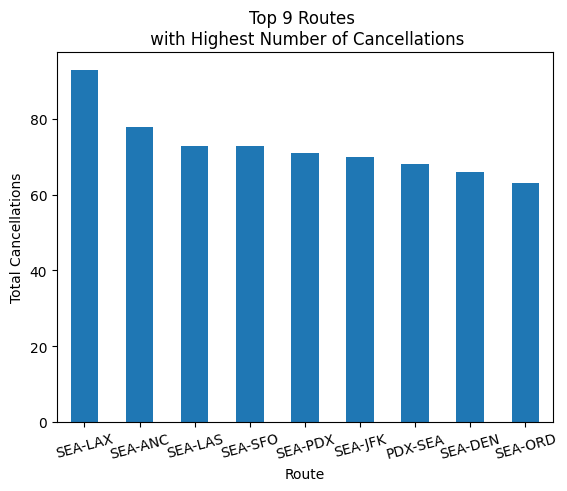

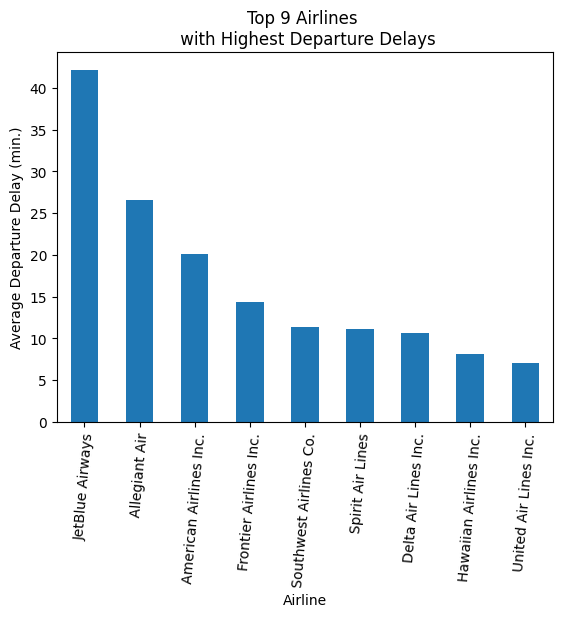

In [98]:
top_routes_by_cancellations = routes_delays_cancels.nlargest(9, 'total_cancellations')
top9_route_cancels_bar = top_routes_by_cancellations.plot.bar(x='route',
                                                              y='total_cancellations', 
                                                              title='Top 9 Routes \n with Highest Number of Cancellations',
                                                              xlabel='Route',
                                                              ylabel='Total Cancellations',
                                                              rot=15,
                                                              legend=False)

top_routes_by_delay = airlines_delays_cancels.nlargest(9, 'mean_dep_delay')
top9_airline_delays_bar = top_routes_by_delay.plot.bar(x='airline',
                                                       y='mean_dep_delay', 
                                                       title='Top 9 Airlines \n with Highest Departure Delays',
                                                       xlabel='Airline',
                                                       ylabel='Average Departure Delay (min.)',
                                                       rot=85,
                                                       legend=False)

plt.show()

- Determine if 10 mile per hour wind gusts or more have a larger average departure delay for both of SEA and PDX, setting `wind_response` to `True` if so and `False` if not.

In [102]:
# Are departure delays impacted by 10+ mph winds from each airport
weather["group"] = weather.wind_gust.apply(lambda x: "≥ 10mph" if x >= 10 else "< 10 mph")
wind_grouped_data = weather.groupby(["group", "origin"]).agg(mean_dep_delay=("dep_delay", "mean"))
display(wind_grouped_data)

# Check if both values in the mean_dep_delay column increased
gte_values = wind_grouped_data.loc["≥ 10mph", "mean_dep_delay"].values
lt_values = wind_grouped_data.loc["< 10 mph", "mean_dep_delay"].values

if all(gte_values > lt_values for gte_values, lt_values in zip(gte_values, lt_values)):
    wind_response = True
else:
    wind_response = False

print(f'{wind_response = }')

mean_dep_delay
group    origin                
< 10 mph PDX           6.686966
         SEA           7.857595
≥ 10mph  PDX           9.147024
         SEA           9.231060

wind_response = True
